In [40]:
# Mount Google Drive to access the dataset stored in it directly from this Colab notebook.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Install necessary libraries
!pip install pandas numpy matplotlib seaborn nltk

In [42]:
# Import data analysis libraries and download nltk resources for NLP.

import pandas as pd
import numpy
import matplotlib as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [43]:
# Load the Amazon Fine Food Reviews dataset from the mounted Google Drive.
df = pd.read_csv('/content/drive/My Drive/amazon-fine-food-reviews/Reviews.csv')

In [44]:
# Limit  analysis to  first 10,000 reviews for a manageable dataset and display first few entries.
df = df.head(10000)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [45]:
print(df.shape)

(10000, 10)


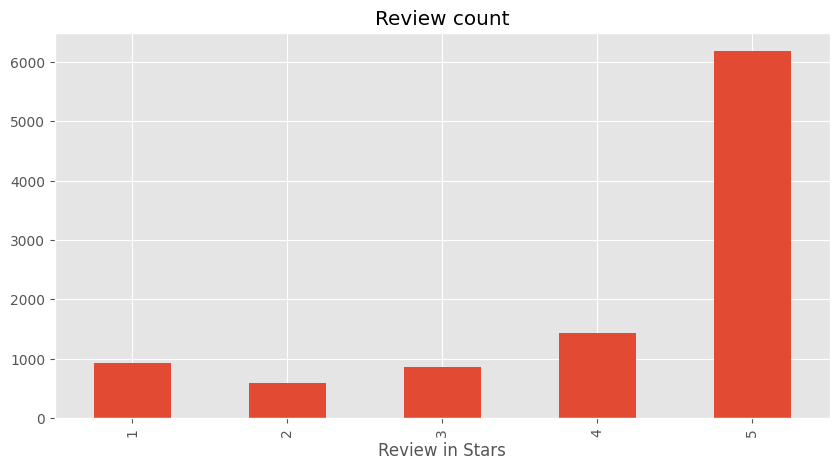

In [46]:
# Visualize the distribution of review scores to understand overall sentiment trends.
import matplotlib.pyplot as plt
ax = df['Score'].value_counts().sort_index() \
.plot(kind='bar',
      title = 'Review count',
      figsize=(10, 5))
ax.set_xlabel('Review in Stars')
plt.show()

In [47]:
# Select and display an example review text
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [48]:
# Tokenize the example review
tokens = nltk.word_tokenize(example)

In [49]:
# Perform part-of-speech tagging on the tokens
tagged = nltk.pos_tag(tokens)

In [50]:
# Apply named entity recognition for identification/classification
entity = nltk.chunk.ne_chunk(tagged)
entity.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


**VADER Sentiment Scoring**

In [51]:
# Initialize the Sentiment Intensity Analyzer for calculating sentiment scores of reviews.
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [52]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [53]:
sia.polarity_scores('I am so sad!')

{'neg': 0.648, 'neu': 0.352, 'pos': 0.0, 'compound': -0.5697}

In [54]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [55]:
#Run Polarity Score on entire dataset
results = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row['Text']
    myid = row['Id']
    results[myid] = sia.polarity_scores(text)


  0%|          | 0/10000 [00:00<?, ?it/s]

In [56]:
# Convert polarity scores dictionary to a DataFrame and merge with original reviews
vaders = pd.DataFrame(results).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


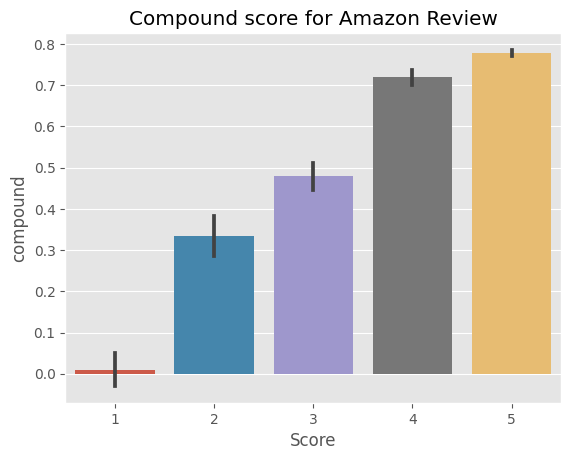

In [57]:
# Visualize  average compound score of reviews for each star rating to assess overall sentiment distribution.
import matplotlib.pyplot as plt
ax = sns.barplot(x='Score', y='compound', data=vaders)
ax.set_title('Compound score for Amazon Review')
plt.show()

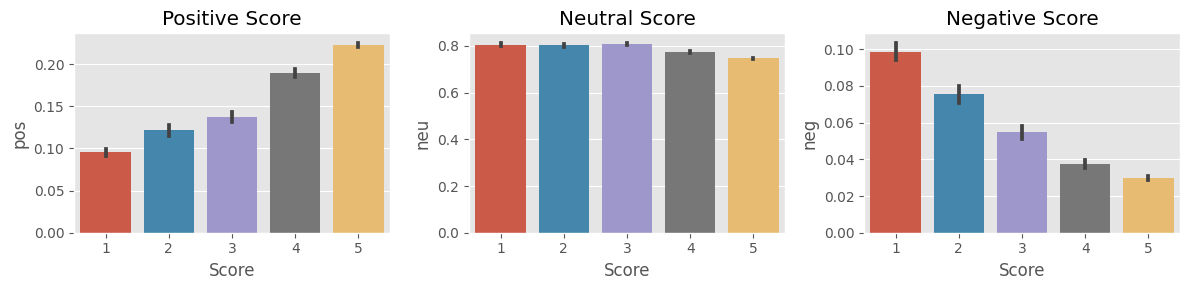

In [58]:
# Create subplots to visualize distribution of positive, neutral, and negative scores across different star ratings.
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])

axs[0].set_title('Positive Score')
axs[1].set_title('Neutral Score')
axs[2].set_title('Negative Score')
plt.tight_layout()
plt.show()

**ROBERTA PRE-TRAINED MODEL**

In [59]:
# Import  necessary libraries for utilizing transformer models.
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [60]:
# Load  ROBERTA model and tokenizer for sentiment analysis.
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [61]:
#VADER Results on example
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [62]:
# Tokenize example text, run it through ROBERTA model and apply softmax to obtain sentiment scores.
Tokenized_input = tokenizer(example, return_tensors='pt')
output = model(**Tokenized_input)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
}
print(scores_dict)

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687466, 'roberta_pos': 0.0029573692}


In [63]:
# Define a function to calculate polarity scores using ROBERTA model for a given text.
def polarity_scores_roberta(example):
  Tokenized_input = tokenizer(example, return_tensors='pt')
  output = model(**Tokenized_input)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
  }
  return scores_dict

In [64]:
# Process each review in the dataset, calculate sentiment scores using both VADER and ROBERTA and store combined results.
results = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
  try:
    text = row['Text']
    myid = row['Id']
    vader_result = sia.polarity_scores(text)
    vader_result_renamed = {}
    for key, value in vader_result.items():
      vader_result_renamed[f"vader_{key}"] = value

    roberta_result = polarity_scores_roberta(text)
    both_results = {**vader_result_renamed, **roberta_result}
    results[myid] = both_results
  except:
    print(f"Error on {myid}")

  0%|          | 0/10000 [00:00<?, ?it/s]

Error on 83
Error on 187
Error on 529
Error on 540
Error on 746
Error on 863
Error on 1053
Error on 1070
Error on 1156
Error on 1321
Error on 1375
Error on 1498
Error on 1575
Error on 1796
Error on 1826
Error on 2169
Error on 2248
Error on 2476
Error on 2492
Error on 2584
Error on 2610
Error on 2897
Error on 2898
Error on 2902
Error on 2928
Error on 2942
Error on 2944
Error on 2947
Error on 2948
Error on 3022
Error on 3023
Error on 3025
Error on 3306
Error on 3788
Error on 3969
Error on 4107
Error on 4110
Error on 4307
Error on 4316
Error on 4408
Error on 4483
Error on 4512
Error on 4553
Error on 4583
Error on 5040
Error on 5182
Error on 5192
Error on 5365
Error on 5442
Error on 5709
Error on 5998
Error on 6003
Error on 6007
Error on 6106
Error on 6234
Error on 6558
Error on 6651
Error on 6798
Error on 6838
Error on 6850
Error on 6886
Error on 6905
Error on 6955
Error on 7077
Error on 7088
Error on 7201
Error on 7604
Error on 7608
Error on 7671
Error on 7701
Error on 7810
Error on 7907

In [65]:
both_results

{'vader_neg': 0.026,
 'vader_neu': 0.811,
 'vader_pos': 0.164,
 'vader_compound': 0.985,
 'roberta_neg': 0.033916812,
 'roberta_neu': 0.19402678,
 'roberta_pos': 0.77205646}

In [66]:
# Convert combined sentiment analysis results into a DataFrame and merge with original reviews.
result_df = pd.DataFrame(results).T
result_df = result_df.reset_index().rename(columns={'index': 'Id'})
result_df = result_df.merge(df, how='left')

In [67]:
result_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452413,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


**Comparing Scores Between Models**

In [68]:
result_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

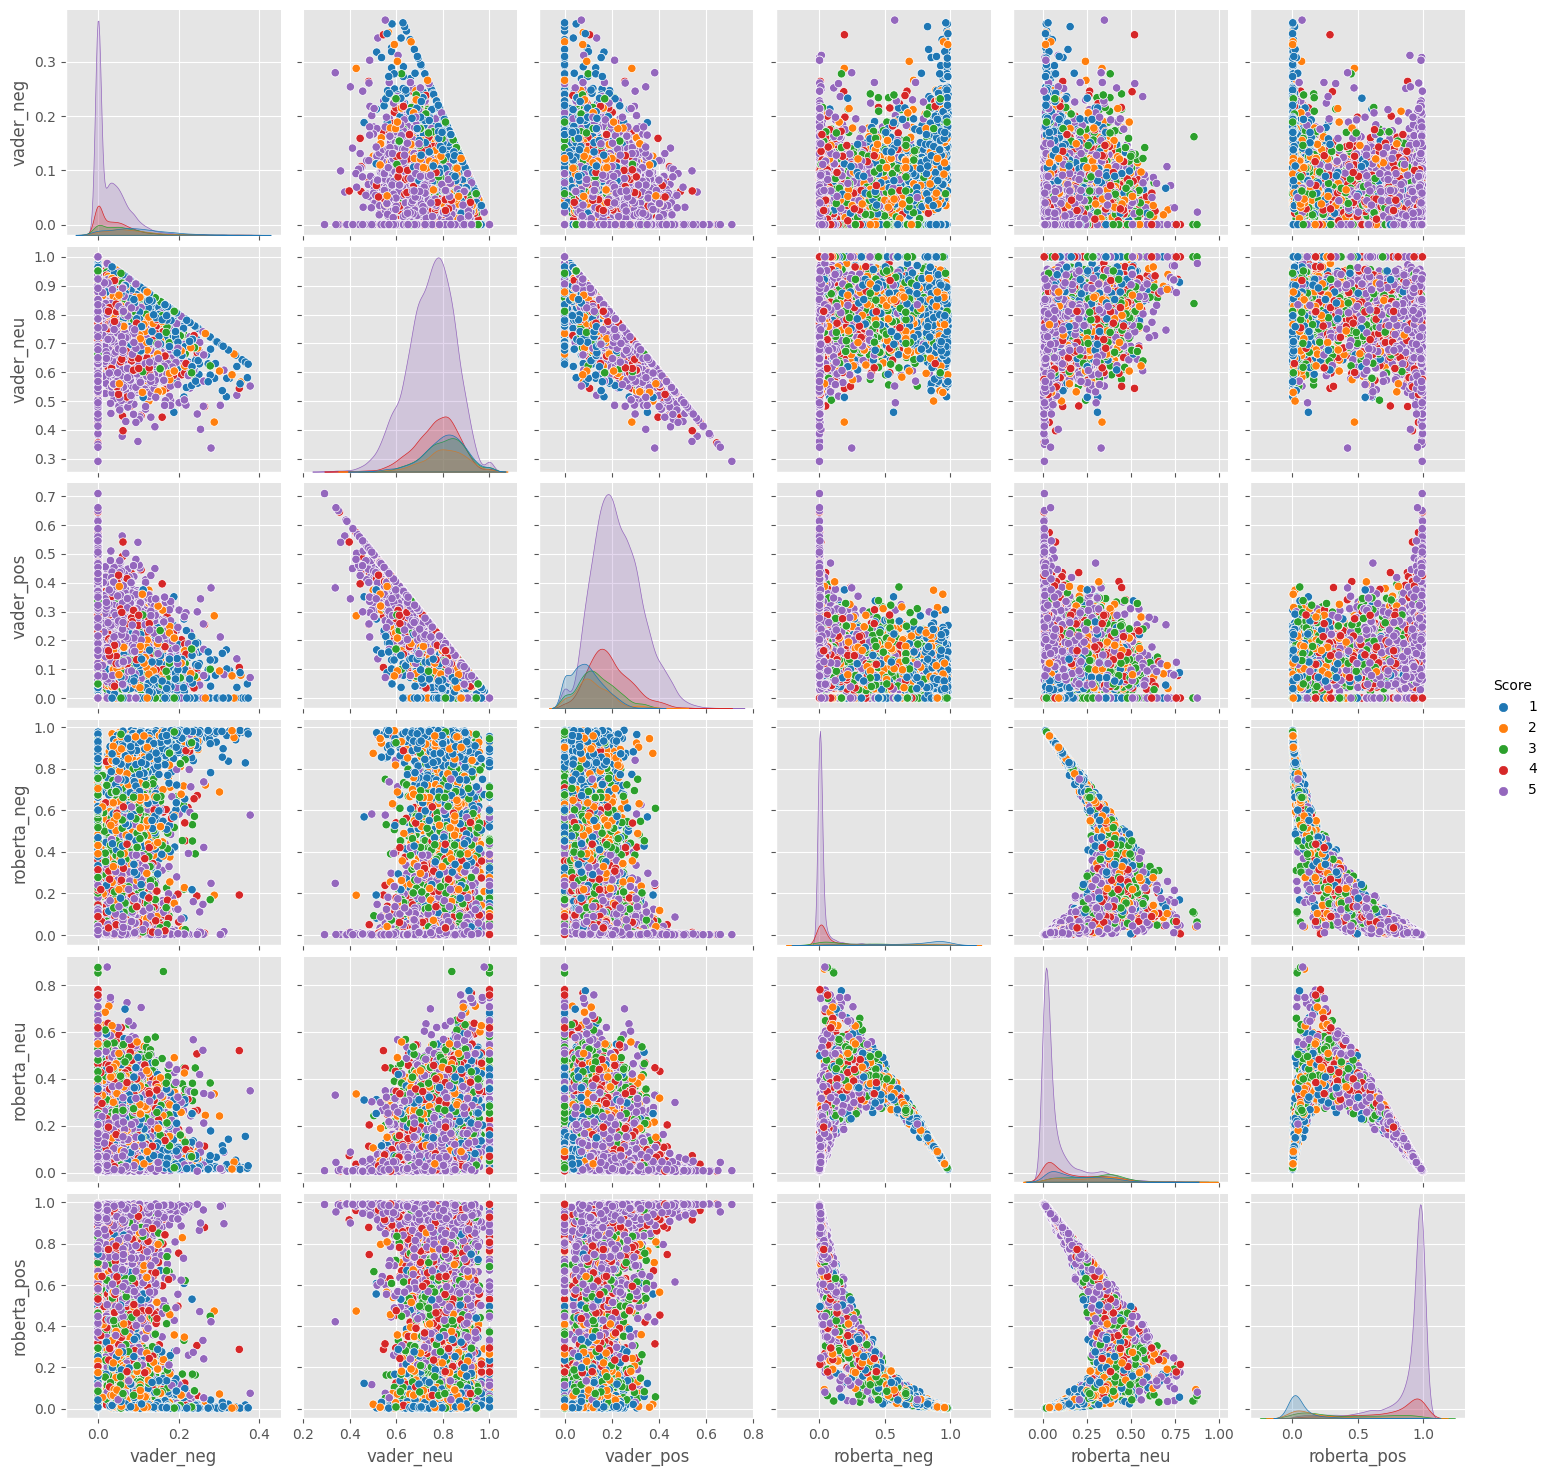

In [69]:
# Create pairplots to visualize relationships between different sentiment scores and review ratings.
sns.pairplot(data=result_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue='Score',
             palette='tab10')
plt.show()

**Review Specific Examples**

Includes analysis of potential 'outliers': High rating / negative sentiment or viceversa.

In [70]:
result_df.query('Score == 1').sort_values('roberta_pos', ascending=False)['Text'].values[0]

'Bisquick GF is easy to use. Pancakes and muffins are very<br />tasty. The product is quick and easy to use. It makes my day.  Gram'

In [71]:
result_df.query('Score == 1').sort_values('vader_pos', ascending=False)['Text'].values[0]

'This flavor is horrible.  There are many other flavors much better.  Hawaiian Hazelnut is great!  Breakfast in Bed is AWesome!'

In [72]:
result_df.query('Score == 5').sort_values('roberta_neg', ascending=False)['Text'].values[0]

'They have a bad taste,i finish giving them away because my son started to cry everytime i tried to give these.I prefer Beech nut or Gerber.Yuck!'

In [73]:
result_df.query('Score == 5').sort_values('vader_neg', ascending=False)['Text'].values[0]

'My two cats must not be interested in grass, because it grew but they ignored it. Had no problems growing it.'

**Tranformers Pipeline**

In [74]:
# Initialize HuggingFace sentiment analysis pipeline for quick and easy sentiment classification.
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [75]:
sent_pipeline("I love Monday.com!!!")

[{'label': 'POSITIVE', 'score': 0.9997677206993103}]